# DNA Classification - Human and Chimpanzee - Udemy

https://www.udemy.com/course/data-science-in-healthcare/

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm as colmap
%matplotlib inline
import seaborn as sns

from IPython.display import Image

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split

In [3]:
labels = ['G protein coupled receptors','Tyrosine Kinase','Tyrosine phosphatase','Synthetase','Synthase','Ion channel','Transcription Factor']

In [4]:
human_data=pd.read_table('C:/Users/joeba/OneDrive/Documents/ML/dna human chimpanzee/human_data.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [5]:
human_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
sequence    4380 non-null object
class       4380 non-null int64
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


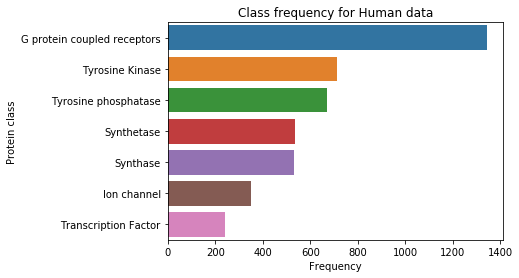

In [6]:
sns.barplot(x=human_data['class'].value_counts(),y=labels)
plt.title('Class frequency for Human data')
plt.xlabel('Frequency')
plt.ylabel('Protein class')
plt.show()

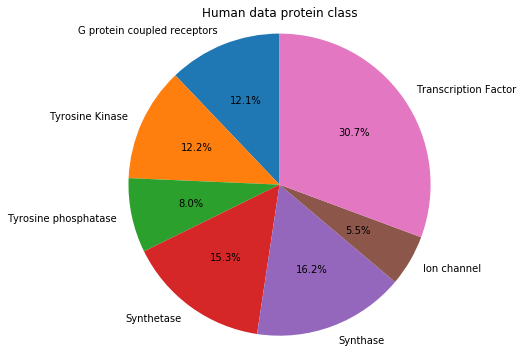

In [7]:
plt.figure(figsize=(6,6))
plt.pie(human_data['class'].value_counts().sort_index(),labels=labels,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Human data protein class')
plt.show()

In [8]:
chimpanzee_data=pd.read_table('C:/Users/joeba/OneDrive/Documents/ML/dna human chimpanzee/chimp_data.txt')
chimpanzee_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [9]:
chimpanzee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
sequence    1682 non-null object
class       1682 non-null int64
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


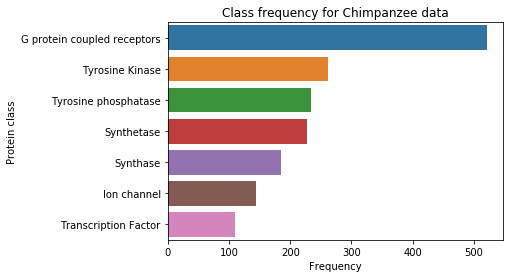

In [10]:
sns.barplot(x=chimpanzee_data['class'].value_counts(),y=labels)
plt.title('Class frequency for Chimpanzee data')
plt.xlabel('Frequency')
plt.ylabel('Protein class')
plt.show()

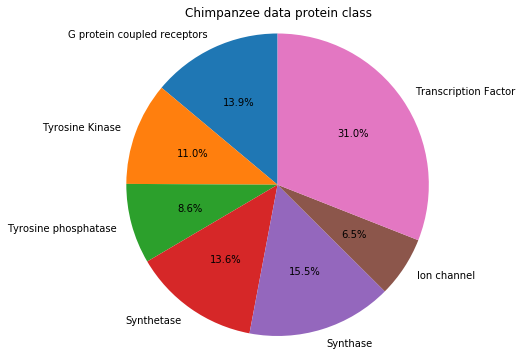

In [11]:
plt.figure(figsize=(6,6))
plt.pie(chimpanzee_data['class'].value_counts().sort_index(),labels=labels,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Chimpanzee data protein class')
plt.show()

In [12]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

cv = CountVectorizer(ngram_range=(4,4))

In [13]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)

In [14]:
human_texts = list(human_data['words'])
for item in range(len(human_data)):
    human_texts[item]=' '.join(human_texts[item])

In [15]:
X_human = cv.fit_transform(human_texts)
y_human = human_data.iloc[:,0].values

In [17]:
X_train_human, X_test_human, y_train_human, y_test_human = train_test_split(X_human, y_human)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 400)
rf.fit(X_train_human, y_train_human)
rf_y_pred_human = rf.predict(X_test_human)
print(accuracy_score(y_test_human, rf_y_pred_human))

0.8904109589041096
